### Multiclass classification

In [1]:
## Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
import pickle as pkl

## Importing utils
from utils import generate_pure_random, generate_constrained_random

## Autoreload
%load_ext autoreload
%autoreload 2

## Imporitng random package
from experiment import Random

## Silence warnings
import warnings
warnings.filterwarnings('ignore')

### Random Dataset with Constraints

(150, 4) (150,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({2: 353, 0: 328, 1: 319})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 475, 0: 277, 2: 248})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 392, 1: 322, 2: 286})
Model :  QuadraticDiscr

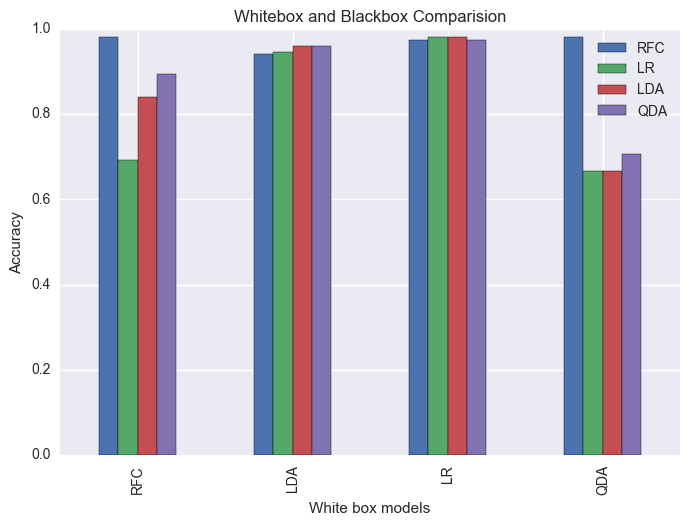

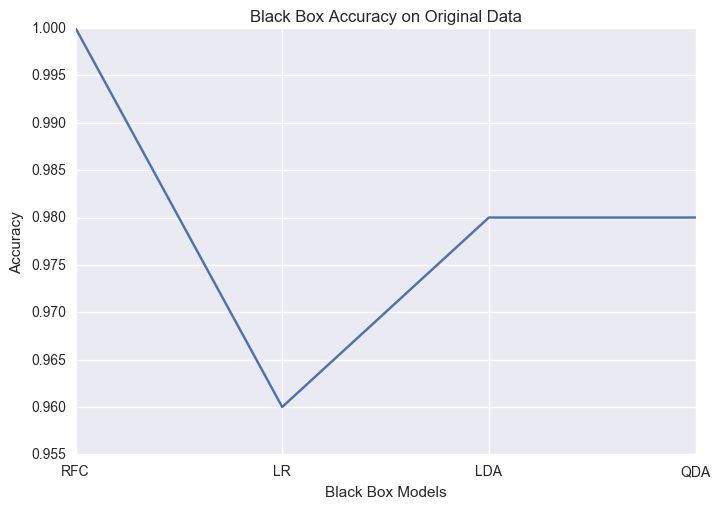

In [5]:
## Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

In [6]:
#

(4177, 10) (4177,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 609, 1: 358, 2: 33})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({0: 444, 2: 342, 1: 214})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 522, 1: 478})
Model :  QuadraticDiscriminan

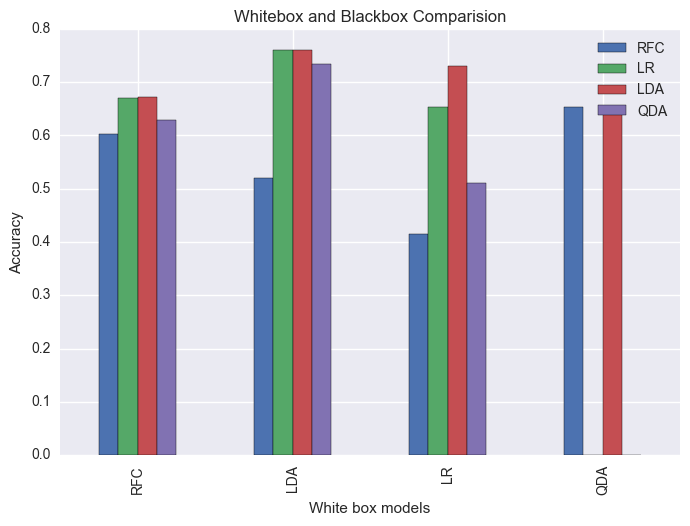

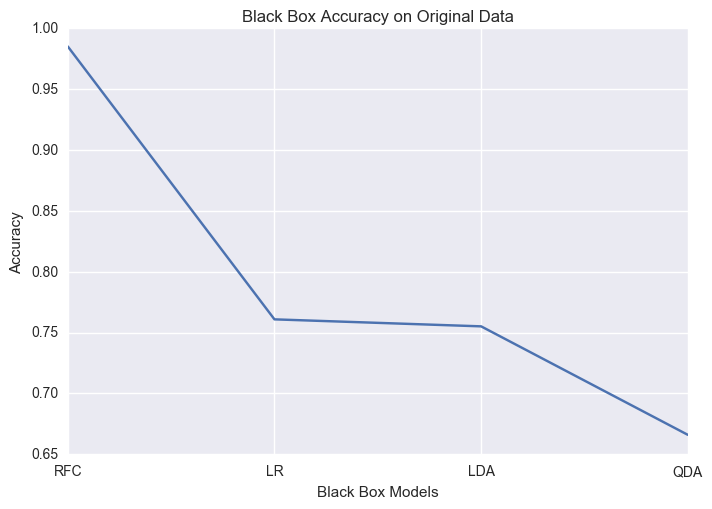

In [27]:
## Abalone Dataset
'''
Abalone dataset characteristics:  Predicting the age of abalone from physical measurements.
The age of abalone is determined by cutting the shell through the cone, staining it,and 
counting the number of rings through a microscope -- a boring and time-consuming task.
'''
data=pd.read_csv('../data/abalone.csv',index_col=0)
data = pd.get_dummies(data)
y = data.pop('Rings').values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(1728, 16) (1728,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({0: 833, 1: 158, 3: 6, 2: 3})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({0: 885, 1: 113, 2: 2})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({0: 996, 1: 4})
Model :  QuadraticDiscrimina

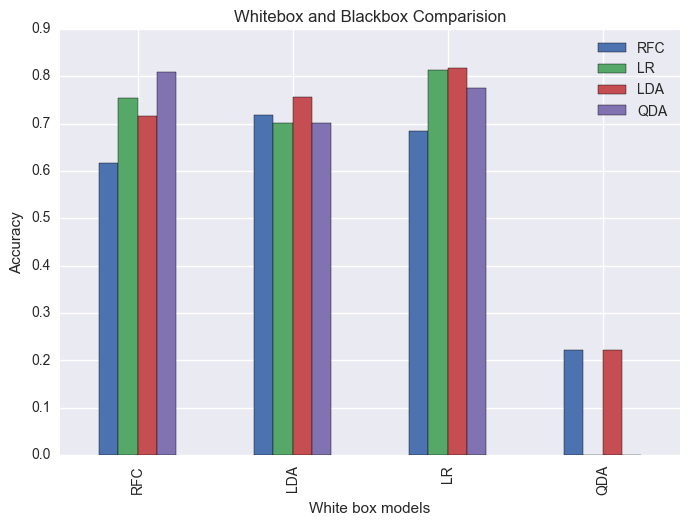

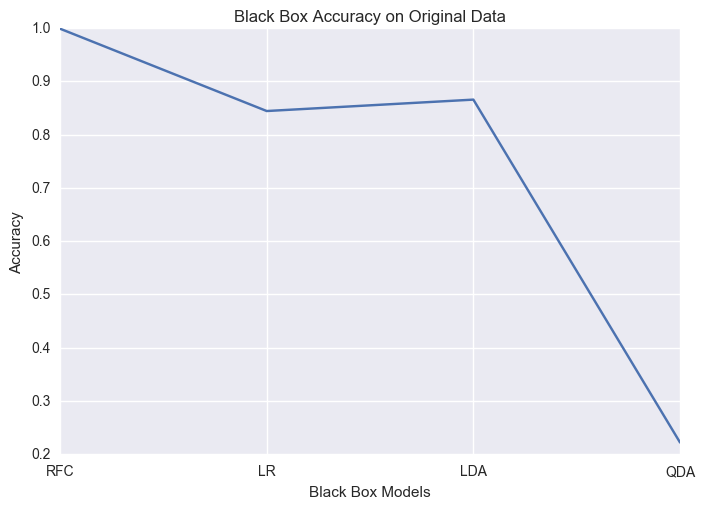

In [63]:
## Car dataset
'''
Car Evaluation Database was derived from a simple hierarchical decision model 
originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: 
Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). 
'''
data=pd.read_csv('../data/Cars.csv',index_col=0)
data = pd.get_dummies(data)
y = data.pop('Labels').values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()

(625, 4) (625,)
Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Distribution:  Counter({1: 553, 0: 447})
Model :  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Distribution:  Counter({1: 553, 0: 447})
Model :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Distribution:  Counter({1: 551, 0: 449})
Model :  QuadraticDiscriminantAnalysis(priors=N

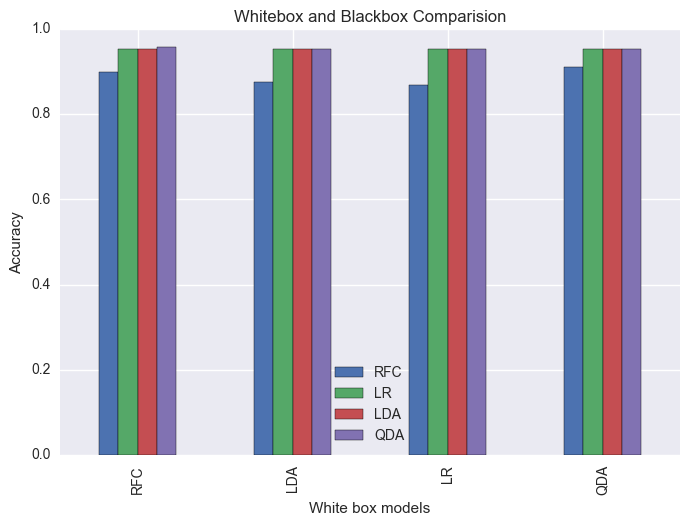

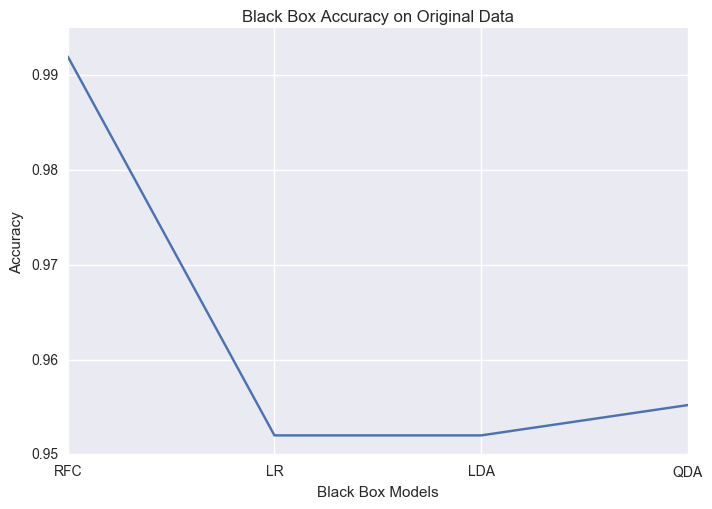

In [74]:
## Balance dataset
data = pd.read_csv('../data/Balance.csv', index_col=0)
y = data.pop('Class').values
X = data.values
feature_names = data.columns
print X.shape, y.shape
random = Random(X, y,feature_names)
random.create_random_data(generate_constrained_random, 1000, data_needed=True)
models = [RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
names = ['RFC', 'LR','LDA', 'QDA']
blacbox_acc = random.fit_blackbox_models(models, names)
random.generate_labels(names)
whitebox = models
whitebox_acc = random.report_whitebox_accuracy(whitebox, names)
random.plot(whitebox_acc, names)
plt.show()

##Blackbox accuracy plot
plt.plot(blacbox_acc)
plt.xlabel('Black Box Models')
plt.ylabel('Accuracy')
plt.title('Black Box Accuracy on Original Data')
plt.xticks(np.arange(len(names)), names)
plt.show()